LAB DA 1 BY SHREYA RAJPAL 21BBS0202

In [10]:
!pip install mlxtend

Q1

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


In [12]:
# Load the employee dataset
df = pd.read_csv('./employee_data.csv')


In [13]:
# Dimensions of the dataset
dimensions = df.shape
print("Dimensions of the dataset:", dimensions)

# Structure of the dataset
structure = df.info()

# Attribute names
attribute_names = df.columns.tolist()
print("Attribute Names:", attribute_names)

# Attribute values
attribute_values = df.describe(include='all')
print("Attribute Values:\n", attribute_values)


Dimensions of the dataset: (30, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Empid        30 non-null     int64 
 1   Name         30 non-null     object
 2   Designation  30 non-null     object
 3   Salary       30 non-null     int64 
 4   Experience   30 non-null     int64 
 5   Vaccinated   30 non-null     object
dtypes: int64(3), object(3)
memory usage: 1.5+ KB
Attribute Names: ['Empid', 'Name', 'Designation', 'Salary', 'Experience', 'Vaccinated']
Attribute Values:
             Empid  Name Designation        Salary  Experience Vaccinated
count   30.000000    30          30     30.000000   30.000000         30
unique        NaN    30           4           NaN         NaN          2
top           NaN  John     Manager           NaN         NaN        Yes
freq          NaN     1           8           NaN         NaN         15
mean    15.50

In [14]:
# (A) First 5 records
print(df.head())

# (B) Last 5 records
print(df.tail())

# (C) Name, Designation, Salary of first 10 records
print(df[['Name', 'Designation', 'Salary']].head(10))

# (D) Name of all records
print(df['Name'])

# (E) All records
print(df)


   Empid     Name Designation  Salary  Experience Vaccinated
0      1     John     Manager   30000          12        Yes
1      2     Jane  Supervisor   25000          10         No
2      3      Doe       Clerk   18000           8        Yes
3      4    Emily      Labour   12000           5         No
4      5  Michael     Manager   31000          12        Yes
    Empid       Name Designation  Salary  Experience Vaccinated
25     26  Alexander  Supervisor   27500          10         No
26     27     Harper       Clerk   16500           5        Yes
27     28  Sebastian      Labour   14000           3         No
28     29       Luna     Manager   35000          12        Yes
29     30       Jack  Supervisor   28000          11         No
      Name Designation  Salary
0     John     Manager   30000
1     Jane  Supervisor   25000
2      Doe       Clerk   18000
3    Emily      Labour   12000
4  Michael     Manager   31000
5    Sarah  Supervisor   24000
6    David       Clerk   19000
7 

In [15]:
import pandas as pd

# Load the employee dataset
df = pd.read_csv('employee_data.csv')

# Select only numeric columns for statistical analysis
numeric_df = df.select_dtypes(include=[np.number])

# (a) Mean, median, mode of the numeric variables
mean_values = numeric_df.mean()
median_values = numeric_df.median()
mode_values = numeric_df.mode().iloc[0]

print("Mean:\n", mean_values)
print("Median:\n", median_values)
print("Mode:\n", mode_values)

# (b) Variance and Covariance
variance = numeric_df.var()
covariance = numeric_df.cov()

print("Variance:\n", variance)
print("Covariance:\n", covariance)

# (c) Correlation of salary to experience
correlation = df['Salary'].corr(df['Experience'])
print("Correlation of Salary to Experience:", correlation)


Mean:
 Empid            15.500000
Salary        22466.666667
Experience        8.233333
dtype: float64
Median:
 Empid            15.5
Salary        23750.0
Experience        9.5
dtype: float64
Mode:
 Empid             1.0
Salary        11000.0
Experience       12.0
Name: 0, dtype: float64
Variance:
 Empid         7.750000e+01
Salary        5.786092e+07
Experience    1.315057e+01
dtype: float64
Covariance:
                   Empid        Salary    Experience
Empid         77.500000  5.724138e+03     -3.500000
Salary      5724.137931  5.786092e+07  26008.045977
Experience    -3.500000  2.600805e+04     13.150575
Correlation of Salary to Experience: 0.9428501882148848


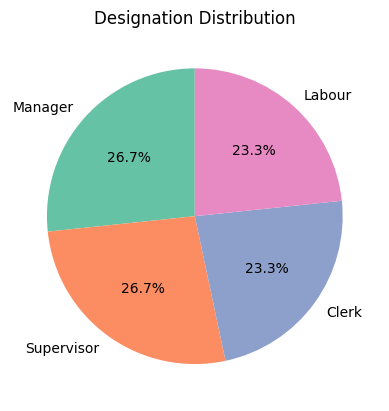

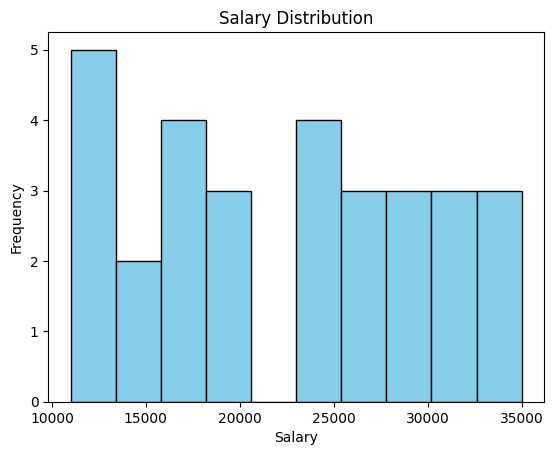

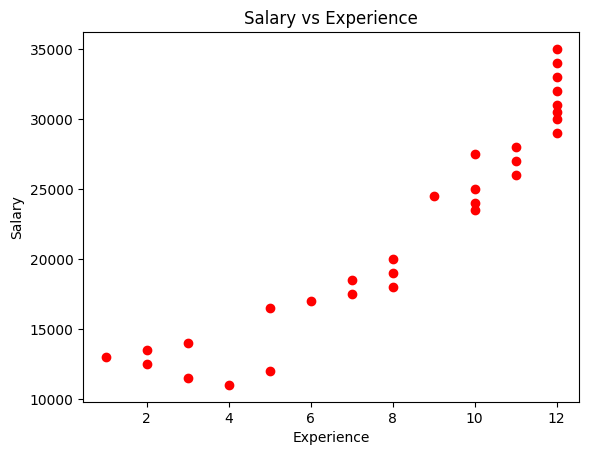

In [16]:
# (A) Pie chart on designation
designation_counts = df['Designation'].value_counts()
designation_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Designation Distribution')
plt.ylabel('')
plt.show()

# (B) Histogram of Salary
plt.hist(df['Salary'], bins=10, color='skyblue', edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

# (C) Scatter plot of Salary to Experience
plt.scatter(df['Experience'], df['Salary'], color='red')
plt.title('Salary vs Experience')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()


Q2 IN PYTHON FILE

Q3

In [17]:
# Assume a sample transactional dataset for the juice stall's history
transactions = [
    ['apple', 'banana', 'mango'],
    ['banana', 'mango', 'orange'],
    ['apple', 'orange'],
    ['banana', 'mango'],
    ['mango', 'orange']
]

# Apply Transaction Encoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori Algorithm
frequent_itemsets = apriori(df_trans, min_support=0.6, use_colnames=True)
print("Frequent Itemsets:\n", frequent_itemsets)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
print("Association Rules:\n", rules)


Frequent Itemsets:
    support         itemsets
0      0.6         (banana)
1      0.8          (mango)
2      0.6         (orange)
3      0.6  (banana, mango)
Association Rules:
   antecedents consequents  antecedent support  consequent support  support  \
0    (banana)     (mango)                 0.6                 0.8      0.6   
1     (mango)    (banana)                 0.8                 0.6      0.6   

   confidence  lift  leverage  conviction  zhangs_metric  
0        1.00  1.25      0.12         inf            0.5  
1        0.75  1.25      0.12         1.6            1.0  


In [18]:
from mlxtend.frequent_patterns import fpgrowth

# Use the same transactional data as above
frequent_itemsets_fp = fpgrowth(df_trans, min_support=0.6, use_colnames=True)
print("Frequent Itemsets using FP-Growth:\n", frequent_itemsets_fp)

# Generate association rules
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.7)
print("Association Rules using FP-Growth:\n", rules_fp)


Frequent Itemsets using FP-Growth:
    support         itemsets
0      0.8          (mango)
1      0.6         (banana)
2      0.6         (orange)
3      0.6  (banana, mango)
Association Rules using FP-Growth:
   antecedents consequents  antecedent support  consequent support  support  \
0    (banana)     (mango)                 0.6                 0.8      0.6   
1     (mango)    (banana)                 0.8                 0.6      0.6   

   confidence  lift  leverage  conviction  zhangs_metric  
0        1.00  1.25      0.12         inf            0.5  
1        0.75  1.25      0.12         1.6            1.0  


Q4


In [19]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder

df = pd.read_csv('./services.csv')

transactions = df.groupby('TransactionID')['Item'].apply(list).tolist()

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_onehot = pd.DataFrame(te_ary, columns=te.columns_)

min_support = 0.4  

frequent_itemsets = fpgrowth(df_onehot, min_support=min_support, use_colnames=True)

print("Frequent Itemsets:")
print(frequent_itemsets)

min_confidence = 0.7  

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

print("\nAssociation Rules:")
print(rules)

Frequent Itemsets:
   support                  itemsets
0      0.8                   (Car B)
1      0.6         (Service Package)
2      0.6                   (Car A)
3      0.4                   (Car C)
4      0.4  (Service Package, Car B)
5      0.4  (Service Package, Car A)
6      0.4            (Car A, Car B)
7      0.4            (Car C, Car B)

Association Rules:
  antecedents consequents  antecedent support  consequent support  support  \
0     (Car C)     (Car B)                 0.4                 0.8      0.4   

   confidence  lift  leverage  conviction  zhangs_metric  
0         1.0  1.25      0.08         inf       0.333333  
